## Assigment 1: Lego Database Analysis


#### Prepare 3 charts using the dataset available here: https://rebrickable.com/downloads/ .Put the data into context and support each chart with comments. For one of the charts create hierarchy using themes table, for one of the charts use sets.year dimension. Try to tell a story or provide some descriptive analysis of dataset combining at least 4 tables.

<br>

In this case study we are analysing Lego's Inventory Dataset. Lego is a line of plastic construction toys that are manufactured by The Lego Group. They consists mainly of colourful sets of plastic bricks and various other parts. This dataset contains information about the inventories, parts, colors, and Lego sets. It has the following structure:

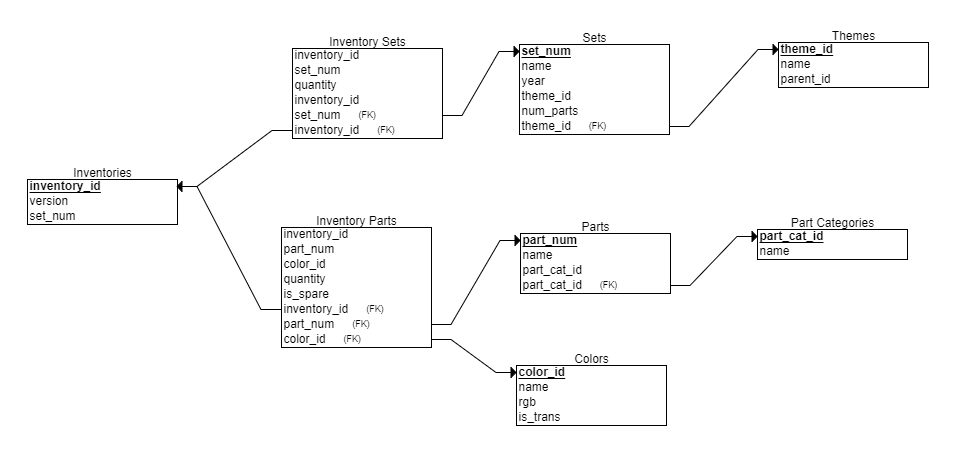


Based on this visual distribution we can identify the main entities and their relationships. We have an inventory and at the same time this is divided in to mains tables Inventory of Parts and Inventory of Sets. The parts has its own charateristics and attributes like Color and Categories, wich form other to tables to analyze. 


Our aim is to try and analyze the dataset in order to create insights that show us some relevant characteristics inside this data. To do that, we are going to combine the Python libraries Pandas for the data analysis and Matplotlib to visualize the results and creat graphics and charts.

##### Analysing the Themes table:

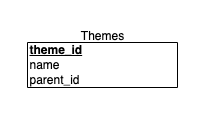

One of the characteristics of this table is that each theme has a "$parent$" theme or is a "$top$". Then, using the data of this table we can stablish an hierarchy order between the themes. Let's take a look to the values of the table.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
themes_data=pd.read_csv('csv/themes.csv')
themes_data.head(10)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
5,6,Airport,5.0
6,7,Construction,5.0
7,8,Farm,5.0
8,9,Fire,5.0
9,10,Harbor,5.0


In [3]:
print("Number of Themes:  %s"%len(themes_data))

Number of Themes:  669


In [4]:
themes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 3 columns):
id           669 non-null int64
name         669 non-null object
parent_id    549 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.1+ KB


In [5]:
#replacing the NaN values of the root themes 
themes_data=themes_data.fillna(0)

#creating a new dataframe grouped by parents
hierarchy_themes=themes_data.set_index(['parent_id', 'name'])
hierarchy_themes.head(15)

id
parent_id name              
0.0       Technic          1
1.0       Arctic Technic   2
          Competition      3
          Expert Builder   4
          Model            5
5.0       Airport          6
          Construction     7
          Farm             8
          Fire             9
          Harbor          10
          Off-Road        11
          Race            12
          Riding Cycle    13
          Robot           14
          Traffic         15

In [6]:
#printing the quantity of parents themes
print("Count of Parents Themes: %s"%len(hierarchy_themes.index.levels[0]))

Count of Parents Themes: 81


To visualize the hierarchical distribution of te themes table we can use a $dendogram$. A $dendrogram$ is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering, or in our case with the hierarchical distribution of the themes. Considering the high number of themes, we are only to plot the numbers of sub themes (number of childs) for each parent theme. Note that ID equals to 0 means that it is the first theme of a sub themes cluster.


#### Grouping the themes by parents:

In [7]:
themes_by_parent = themes_data.groupby('parent_id').count()
themes_by_parent.head(10)

,id,name
parent_id,,
0.0,120,120
1.0,10,10
5.0,10,10
22.0,8,8
23.0,13,13
38.0,9,9
50.0,14,14
52.0,15,15
67.0,18,18


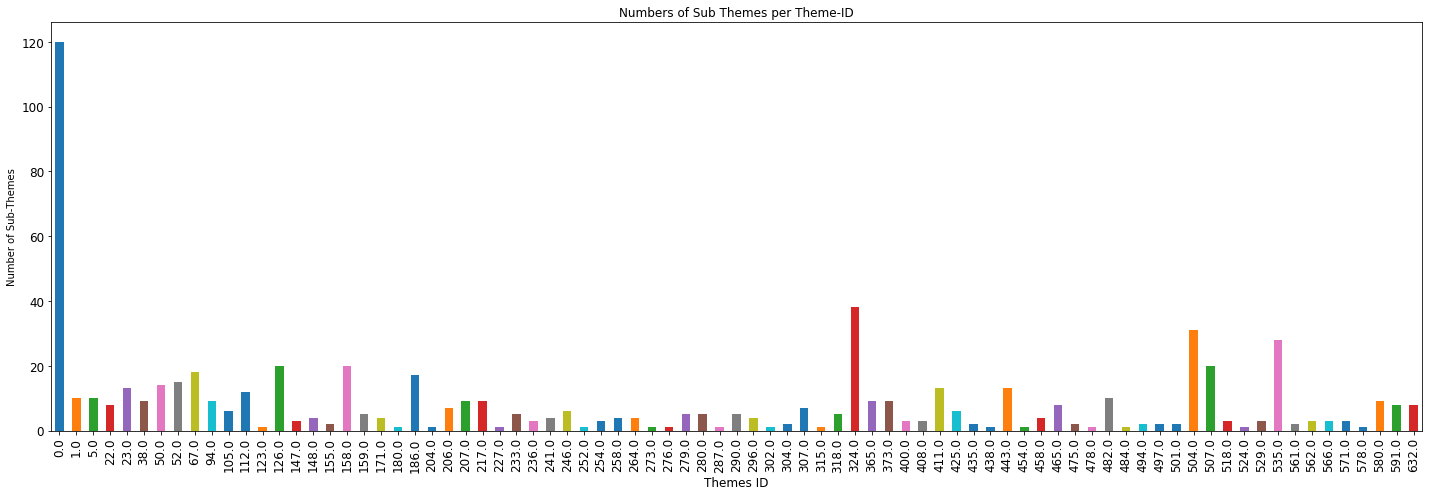

In [8]:
fig, ax = plt.subplots(figsize=(20,7))
themes_by_parent['id'].plot(ax=ax,kind='bar',style=['r'],fontsize=12)
ax.set_xlabel('Themes ID',fontsize=12)
ax.set_ylabel('Number of Sub-Themes')
ax.set_title('Numbers of Sub Themes per Theme-ID')
fig.tight_layout()

<br>

### Analysing the Sets table:

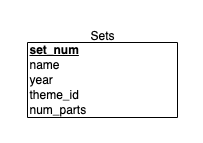

This table has more fields that we can use in order to apply a more detailed analysis. It is interesting to observe how some of these characteristics vary over the years.

#### Reading the data of sets table:

In [9]:
sets_data = pd.read_csv('csv/sets.csv')
sets_data.head(10)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12
5,0013-1,Space Mini-Figures,1979,143,12
6,0014-1,Space Mini-Figures,1979,143,12
7,0015-1,Space Mini-Figures,1979,143,18
8,0016-1,Castle Mini Figures,1978,186,15
9,00-2,Weetabix Promotional House 1,1976,413,147


#### Analysing Set Table Information:

In [10]:
sets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 5 columns):
set_num      14498 non-null object
name         14498 non-null object
year         14498 non-null int64
theme_id     14498 non-null int64
num_parts    14498 non-null int64
dtypes: int64(3), object(2)
memory usage: 453.1+ KB


One of the analysis that we want apply is to group the sets by year to calculate how many sets per year the Lego company have developed.

In [11]:
print("Count of Years: %s" %len(sets_data['year'].unique()))

Count of Years: 69


#### Graphing the results:

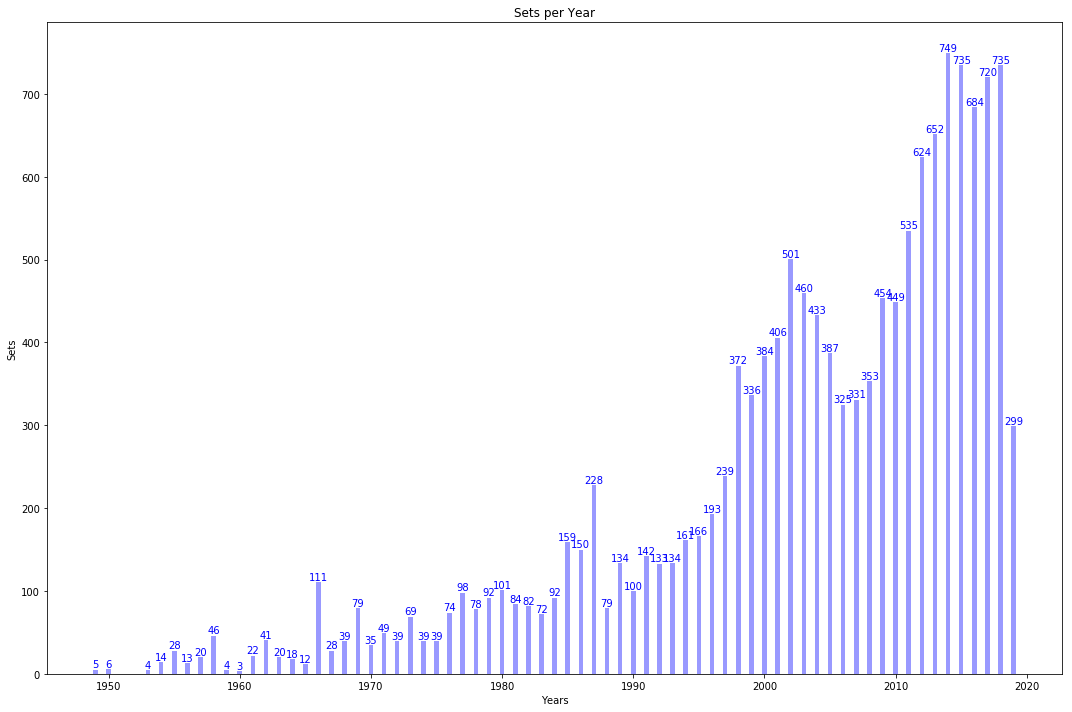

In [12]:
year_sets=sets_data.groupby(['year']).groups
years=list(year_sets.keys())
sets_count_years=[len(v) for v in year_sets.values()]

#plotting the results
fig, axes = plt.subplots(figsize=(15, 10))
#index=np.arange(years+1)
bar_width = 0.35
opacity = 0.4

rects1 = axes.bar(years,sets_count_years, bar_width,alpha=opacity, color='b', label='Cost')

def adding_label(rects):
    """
    Displaying the value for each bar
    """
    for rect in rects:
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width()/2., height,
                '%s' % round(height,2),
                ha='center', va='bottom',color='b')
adding_label(rects1)

axes.set_xlabel('Years')
axes.set_ylabel('Sets')
axes.set_title('Sets per Year')
fig.tight_layout()

Other interesting data to analyze is the average number of parts in sets over the years.

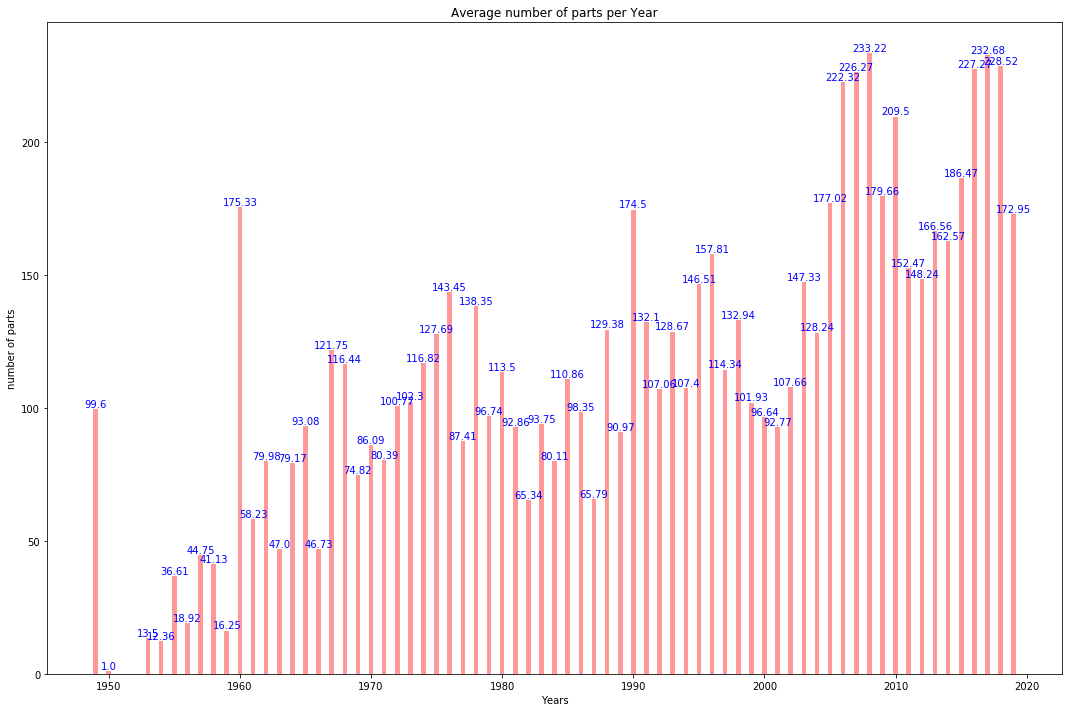

In [13]:
parts_years = sets_data.groupby('year')['num_parts'].mean()
#plt.plot(parts_years)

fig, axes = plt.subplots(figsize=(15, 10))

rects2 = axes.bar(years,parts_years, bar_width,alpha=opacity, color='r', label='Cost')

adding_label(rects2)

axes.set_xlabel('Years')
axes.set_ylabel('number of parts')
axes.set_title('Average number of parts per Year')
#axes.set_xticks()
fig.tight_layout()
plt.show()

Analysing the output the Lego's set shows a variety of values over the years. Demonstrating the evolution of the company's products and how complex these have become.

<br>

### Analyzing the colors and parts in the parts inventory
<br>

Now our goal  is try to identify some interesting relationship inside the part's inventory, focusing on parts categories and colors. This is the main tables that we are going to use:

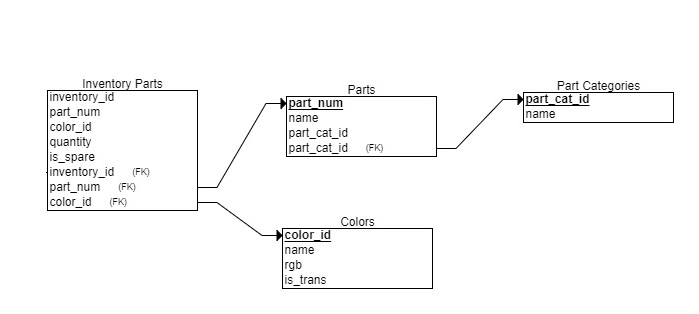

Reading the data and showing the description of the main table Inventory Parts.

In [14]:
inventory_parts=pd.read_csv('csv/inventory_parts.csv')
parts=pd.read_csv('csv/parts.csv')
colors=pd.read_csv('csv/colors.csv')
parts_categories=pd.read_csv('csv/part_categories.csv')

inventory_parts.describe()

,inventory_id,color_id,quantity
count,733164.000000,733164.000000,733164.000000
mean,11873.843155,82.927603,3.238807
std,8019.551476,629.947530,8.063923
min,1.000000,-1.000000,1.000000
25%,5434.000000,2.000000,1.000000
50%,10813.000000,15.000000,2.000000
75%,16015.000000,71.000000,3.000000
max,32930.000000,9999.000000,1440.000000


#### Analysing the table by columns color_id and part_num

In [15]:
inventory_by_colors = inventory_parts.groupby('color_id').count()
inventory_by_colors.head(10)

,inventory_id,part_num,quantity,is_spare
color_id,,,,
-1,8,8,8,8
0,138151,138151,138151,138151
1,36621,36621,36621,36621
2,15690,15690,15690,15690
3,638,638,638,638
4,62228,62228,62228,62228
5,2446,2446,2446,2446
6,3851,3851,3851,3851
7,26241,26241,26241,26241


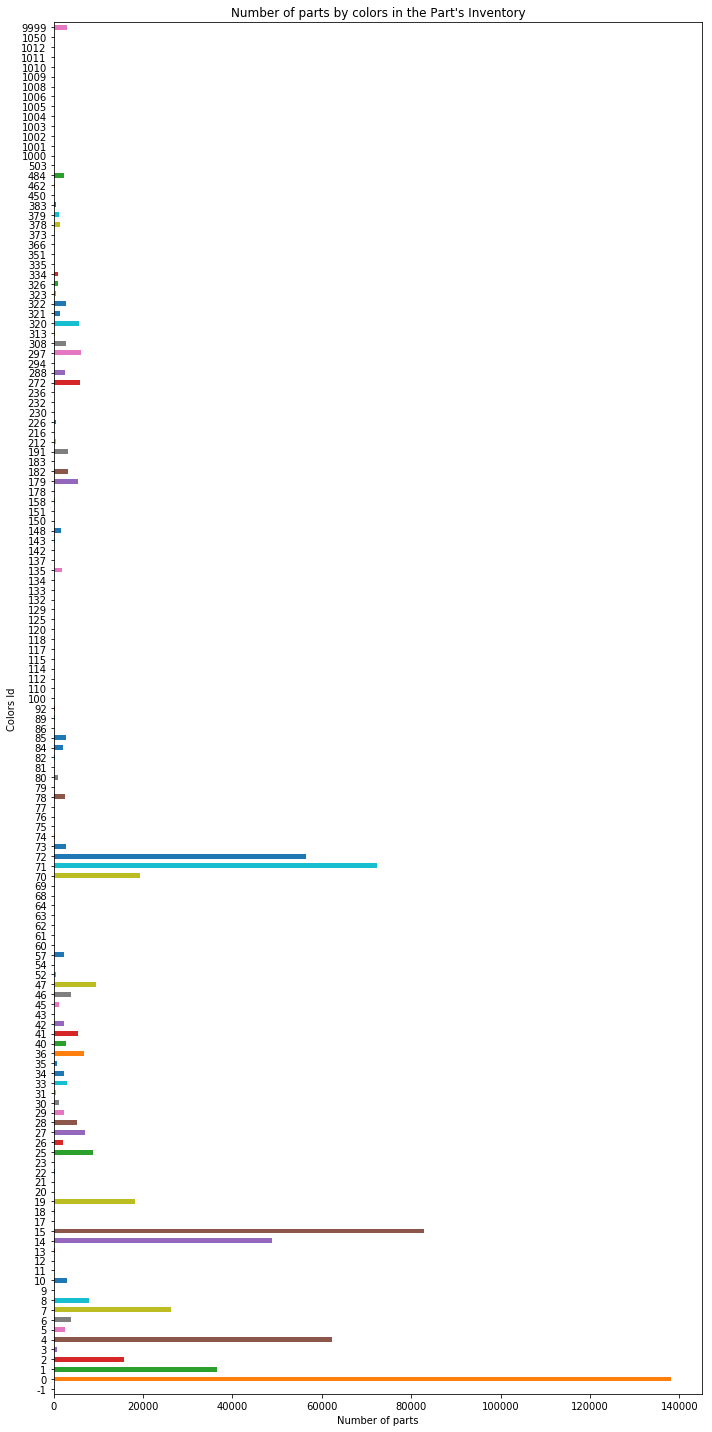

In [16]:
fig, axes = plt.subplots(figsize=(10, 20))

inventory_by_colors['part_num'].plot(ax=axes,kind='barh')

axes.set_ylabel('Colors Id')
axes.set_xlabel('Number of parts')
axes.set_title('Number of parts by colors in the Part\'s Inventory')
fig.tight_layout()

<br>

Other analysis that we can realize is grouping the table by the columns: color_id and part_num

In [17]:
inventory_by_color_parts=inventory_parts.pivot_table(index=['color_id','part_num'])
inventory_by_color_parts.head()

inventory_id  quantity
color_id part_num                        
-1       3437           27705.0       4.0
         6003555         7850.0       1.0
         63672          11502.0       1.0
         65535g1         4365.0       1.0
         65535g2         4365.0       1.0

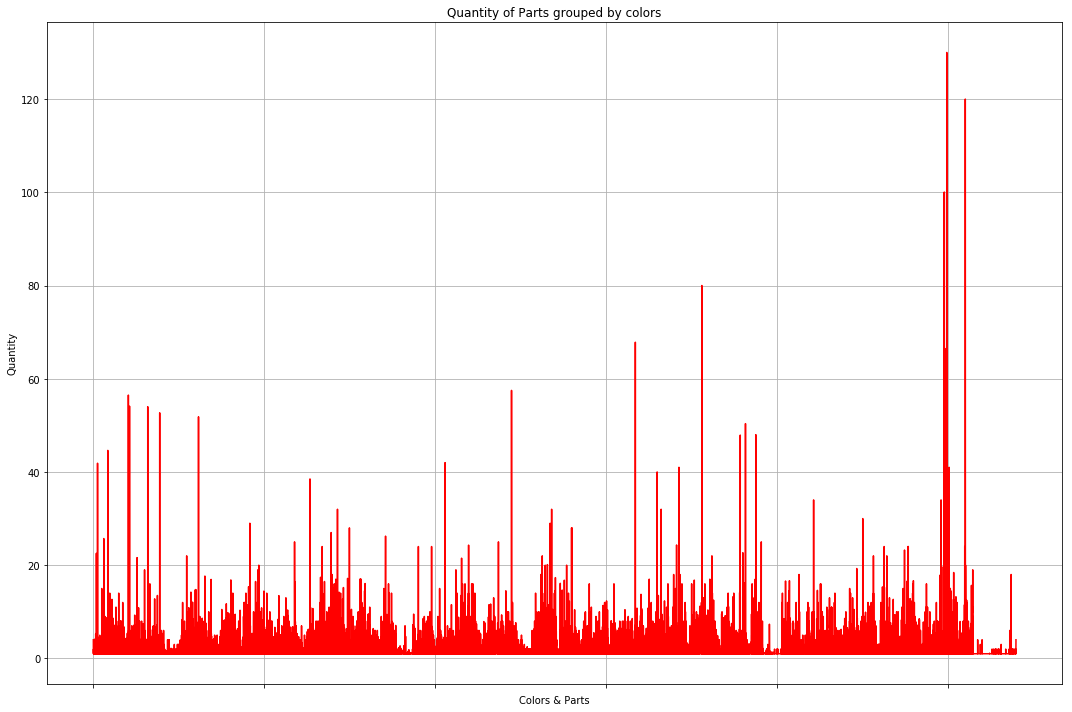

In [18]:
fig, axes = plt.subplots(figsize=(15, 10))
inventory_by_color_parts['quantity'].plot(ax=axes,color='r',kind='line',grid=True)
axes.set_ylabel('Quantity')
axes.set_xlabel('Colors & Parts')
axes.set_title('Quantity of Parts grouped by colors')
fig.tight_layout()

Let's continue analyzing the color table.

In [19]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [20]:
num_colors = colors.shape[0]
print("Number of colors available: %s"%num_colors)

Number of colors available: 178


One interesting column to analyze in colors table is "is_tran" that indicates if a color is transparent or not. Lets figure it out the comparison between transparent and not transparent colors.

In [21]:
colors_trans = colors.groupby('is_trans').count()
colors_trans

,id,name,rgb
is_trans,,,
f,150,150,150
t,28,28,28


#### Plotting the relation between transparent and not transparent colors: 

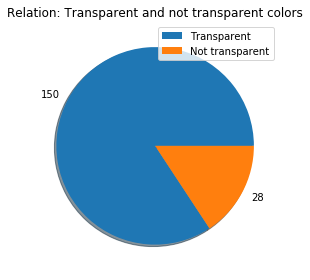

In [22]:
fig, axes = plt.subplots(figsize=(6, 4))
values=colors_trans['id']
colors_trans['id'].plot(ax=axes,kind='pie',labels=(str(values[0]),
                        str(values[1])),shadow=True,)
axes.set_ylabel('')
axes.legend(['Transparent','Not transparent'],loc='best')
axes.set_title("Relation: Transparent and not transparent colors")
fig.tight_layout()

Another interesting relationship to take a look at is parts and their categories, in order to visualize the number of parts that belong to each category.

In [23]:
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


#### Grouping the parts by categories:

In [24]:
parts_by_category=parts.groupby('part_cat_id').count()
parts_by_category.head(5)

,part_num,name
part_cat_id,,
1,263,263
2,1023,1023
3,417,417
4,2980,2980
5,132,132


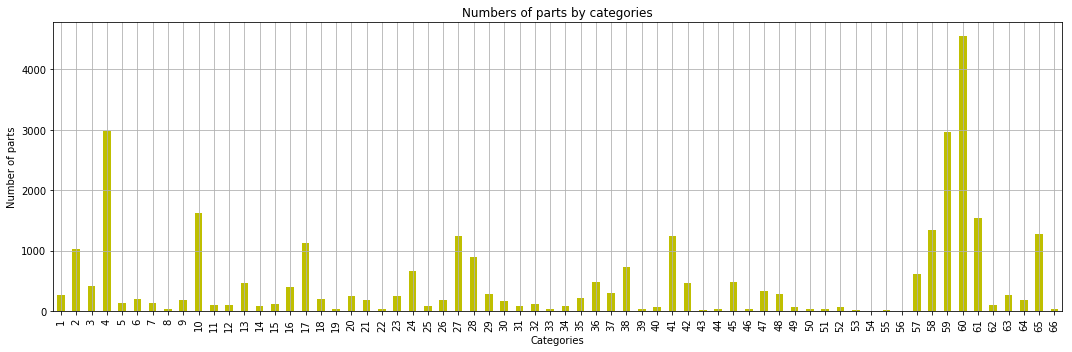

In [25]:
fig, axes = plt.subplots(figsize=(15, 5))
parts_by_category['part_num'].plot(color='y',ax=axes,kind='bar',grid=True)
axes.set_ylabel('Number of parts')
axes.set_xlabel('Categories')
#axes.legend(['Transparent','Not transparent'],loc='best')
axes.set_title("Numbers of parts by categories")
fig.tight_layout()

#### Conclusions:

After the analysis of the dataset we can reach the conclusion that Lego sets have become more complex over the years. We did analysis in order to describe some characteristics inside the data and we made a visualiaztion of them.